## Veri Setinin Hikayesi

#### Problem:
* İşletmenin hayatta kalması ve karlılığı için nasıl bir satış ve üretim politkası izleyeceği konusunda kararsız kalması. 

#### Amaç ve Kapsam:
* E-Ticaret platformu olan Amazonun hindistandaki satış bilgilerinin olduğu bir veri seti var elimizde. Bu veriden çıkarabildiğimiz kadar anlamlı bilgi çıkaracağız, görselleştireceğiz ve sınıflandırma tahminlerinde bulunacağız. Satış verilerinde uygun her bir özelliği kullanarak ürün kategorisinin sınıflandırma tahminlemesini yapmak istiyoruz. Bu sayede hangi beden,şehir,stil,fiyat vb özellikler ürün kategorisini nasıl etkiliyor görerek firmanın karlılık için alacağı aksiyonlara kararsal olarak ışık tutmak istiyoruz. Tüm bunları sağlıklı yapabilmemiz için veriyi tanımalı ve tanıdıktan sonra veri ön işleme yaparak tüm kirliliğinden kurtulmalıyız.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Veriyi Yükleme ve Ön İnceleme

In [2]:
dff=pd.read_csv("amazonSaleReport.csv")
dff.head()
df=dff.copy()

C:\Users\Uveys\AppData\Local\Temp\ipykernel_6720\2513928710.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dff=pd.read_csv("amazonSaleReport.csv")


In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

## Veri Ön İşleme


### Sütun İsimsiz Olduğu İçin Ne İşe Yaradığını Bilmiyoruz O Yüzden Komple Kaldırıyoruz

In [4]:
df.drop(columns=['Unnamed: 22'], inplace=True)
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


### Sütun İsimlerini İsimlendirme Kurallarına Göre Standart Hale Getiriyoruz

In [5]:
df.columns = [col.strip().replace("-", "_").lower() for col in df.columns]
print(df.columns)

Index(['index', 'order id', 'date', 'status', 'fulfilment', 'sales channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by'],
      dtype='object')


### Değişkenleri Tanıyalım ve NaN Değerlerini Dolduralım

In [6]:
df["courier status"].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: courier status, dtype: int64

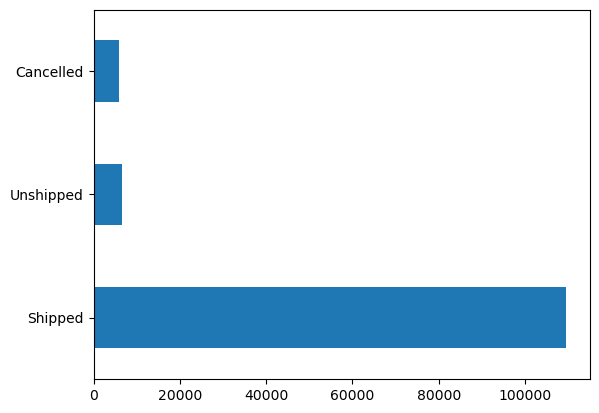

In [7]:
df["courier status"].value_counts().plot.barh();

In [8]:
df["courier status"].value_counts(dropna=False)#nan değerleri de toplar

Shipped      109487
NaN            6872
Unshipped      6681
Cancelled      5935
Name: courier status, dtype: int64

In [9]:
df['courier status'].fillna('Unknown', inplace=True)#nan değerleri Unknown olarak doldur.

In [10]:
df["courier status"].value_counts()

Shipped      109487
Unknown        6872
Unshipped      6681
Cancelled      5935
Name: courier status, dtype: int64

In [11]:
# 'Amazon.in' satış kanalına 'INR' ile eksik 'para birimi' atfediliyor
df.loc[(df['sales channel'] == 'Amazon.in') & (df['currency'].isnull()), 'currency'] = 'INR'
# 'Amazon Dışı' satış kanalı için para birimini 'Bilinmeyen' olarak işaretliyoruz
df.loc[(df['sales channel'] == 'Non-Amazon') & (df['currency'].isnull()), 'currency'] = 'Unknown'
print(df.groupby('sales channel')
['currency'].value_counts(dropna=False))

sales channel  currency
Amazon.in      INR         128851
Non-Amazon     Unknown        124
Name: currency, dtype: int64


In [12]:
# Eksik gönderim ayrıntılarının aynı satırlardan olup olmadığının araştırılması
missing_shipping_info = df[df['ship_city'].isnull() &
df['ship_state'].isnull() &
                             df['ship_postal_code'].isnull() & df['ship_country'].isnull()]
print(missing_shipping_info)

         index             order id      date                        status  \
1871      1871  404-0566904-4825137  04-29-22                       Shipped   
1872      1872  404-0566904-4825137  04-29-22                       Shipped   
8752      8752  406-4003386-8768363  04-25-22                       Shipped   
11215    11215  402-0107720-7057168  04-23-22                       Shipped   
13252    13252  407-4532637-8415521  04-22-22                     Cancelled   
15688    15688  404-9229894-8608305  04-21-22                       Shipped   
16787    16787  402-4919636-4333150  04-20-22  Shipped - Delivered to Buyer   
18351    18351  405-4927647-8064368  04-19-22                       Shipped   
22930    22930  402-8628677-0457954  04-16-22  Shipped - Returned to Seller   
24986    24986  406-4079063-8291520  04-15-22                     Cancelled   
30379    30379  404-7506843-7913132  04-12-22  Shipped - Delivered to Buyer   
37963    37963  407-3064376-9158743  04-08-22       

In [13]:
#Eksik Shipping değerlerini Unknown olarak doldurma
shipping_columns = ['ship_city', 'ship_state', 'ship_postal_code','ship_country']
for column in shipping_columns:
    df[column].fillna('Unknown', inplace=True)
print(df[shipping_columns].isnull().sum())

ship_city           0
ship_state          0
ship_postal_code    0
ship_country        0
dtype: int64


In [14]:
#(Promosyon uygulama sütunundaki boş değerleri promosyon yok olarak doldurmak) 
df['promotion_ids'].fillna('No Promotion', inplace=True)
#(Easy Ship olmayanları Normal Ship olarak doldurmak)
df['fulfilled_by'].fillna('Normal Ship', inplace=True)
print(df[['promotion_ids', 'fulfilled_by']].isnull().sum())

promotion_ids    0
fulfilled_by     0
dtype: int64


In [15]:
df['ship_postal_code'] = df['ship_postal_code'].apply(lambda x: '{:0>5}'.format(x) if pd.notnull(x) else x)
print(df['ship_postal_code'].head())

0    400081.0
1    560085.0
2    410210.0
3    605008.0
4    600073.0
Name: ship_postal_code, dtype: object


Bu işlem sonucunda, 'ship_postal_code' sütunundaki değerler 5 karakter uzunluğunda olacak şekilde düzenleniyor ve başlarına gerekiyorsa sıfır ekleniyor. Eğer değer NaN ise, aynı NaN değeri geri döndürülüyor. 

In [16]:
df['date'] = pd.to_datetime(df['date'])# yıl-ay-gün formatına çevirdik tarihi

In [17]:
df["date"].head()

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: date, dtype: datetime64[ns]

In [18]:
df.select_dtypes(include='object')# kategorik tipli değişkenleri(object) olanları görüntüleme

,order id,status,fulfilment,sales channel,ship_service_level,style,sku,category,size,asin,courier status,currency,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,fulfilled_by
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,INR,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,Easy Ship
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,INR,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,Easy Ship
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,INR,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Normal Ship
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,INR,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,Easy Ship
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,INR,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,Normal Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,INR,HYDERABAD,TELANGANA,500013.0,IN,No Promotion,Normal Ship
128971,402-9551604-7544318,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,INR,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Normal Ship
128972,407-9547469-3152358,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,INR,HYDERABAD,TELANGANA,500049.0,IN,No Promotion,Normal Ship
128973,402-6184140-0545956,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,INR,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Normal Ship


In [19]:
categorical_columns = ['status', 'fulfilment', 'sales channel',
'ship_service_level',
'currency',
'promotion_ids',
'style', 'category', 'size', 'courier status',
'ship_city', 'ship_state', 'ship_country',
'fulfilled_by']
for column in categorical_columns:
    df[column] = df[column].astype('category')
print(df.dtypes)

#df.degisken = pd.Categorical(df.degisken) şeklinde tek satırda yapabilirdik.
#object olarak tanımlanan değişkenleri category olarak değiştirdik

index                          int64
order id                      object
date                  datetime64[ns]
status                      category
fulfilment                  category
sales channel               category
ship_service_level          category
style                       category
sku                           object
category                    category
size                        category
asin                          object
courier status              category
qty                            int64
currency                    category
amount                       float64
ship_city                   category
ship_state                  category
ship_postal_code              object
ship_country                category
promotion_ids               category
b2b                             bool
fulfilled_by                category
dtype: object


In [20]:
df.drop_duplicates(inplace=True)
df.to_csv('Cleaned_Amazon_Sale_Report.csv', index=False)

In [21]:
df=pd.read_csv('Cleaned_Amazon_Sale_Report.csv')
df.head()

,index,order id,date,status,fulfilment,sales channel,ship_service_level,style,sku,category,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Normal Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,False,Normal Ship


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   order id            128975 non-null  object 
 2   date                128975 non-null  object 
 3   status              128975 non-null  object 
 4   fulfilment          128975 non-null  object 
 5   sales channel       128975 non-null  object 
 6   ship_service_level  128975 non-null  object 
 7   style               128975 non-null  object 
 8   sku                 128975 non-null  object 
 9   category            128975 non-null  object 
 10  size                128975 non-null  object 
 11  asin                128975 non-null  object 
 12  courier status      128975 non-null  object 
 13  qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  amount              121180 non-nul

## Veriyi Tekrar Kontrol Ediyoruz

In [23]:
df.isnull().sum()

index                    0
order id                 0
date                     0
status                   0
fulfilment               0
sales channel            0
ship_service_level       0
style                    0
sku                      0
category                 0
size                     0
asin                     0
courier status           0
qty                      0
currency                 0
amount                7795
ship_city                0
ship_state               0
ship_postal_code         0
ship_country             0
promotion_ids            0
b2b                      0
fulfilled_by             0
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0


In [25]:
df["amount"].median()

605.0

### "amount" Değişkenindeki Eksik Verileri Veri Setinin En Yüksek amount değeri olan Verilerinin %50'sinin Ortalaması İle Doldurmayı Tercih Ettim. Tüm amount'un Ortalaması 648 iken bizim ortalama formülümüz ile 848 değerine ulaştık. Böyle yapmamızın sebebi min ve max değerlerinin arasının çok açık olması, yani std yüksek. Ben de yüksek sınırdaki verileri de temsilen bu ortalama yöntemini tercih ettim. amount değişkenin yeni ortalaması 660 oldu.

In [26]:
half_max_values = df['amount'].nlargest(int(len(df) / 2))
half_max_values

42039     5584.00
11160     5495.00
24494     4235.72
89150     3036.00
121225    2894.00
           ...   
11606      583.00
13309      583.00
14009      583.00
15442      583.00
18479      583.00
Name: amount, Length: 64487, dtype: float64

In [27]:
half_max_values.mean()

848.2664830120799

In [28]:
df["amount"].fillna(half_max_values.mean(), inplace = True)


In [29]:
df["amount"].isnull().sum()

0

In [30]:
df["amount"].mean()

660.6312505142793

## Aykırı Değer Analizi

### Sektör bilgisi,standart sapma eşiği, Z skrou yaklaşımı gibi methodlarla sürekli değişkenler içindeki aykırı değerler tespit edilir

In [31]:
df["amount"].count

<bound method Series.count of 0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: amount, Length: 128975, dtype: float64>

In [32]:
df_amount=df["amount"]
df_amount.head()

0    647.62
1    406.00
2    329.00
3    753.33
4    574.00
Name: amount, dtype: float64

## Boxplot ile Aykırı Değerleri Görelim

<Axes: xlabel='amount'>

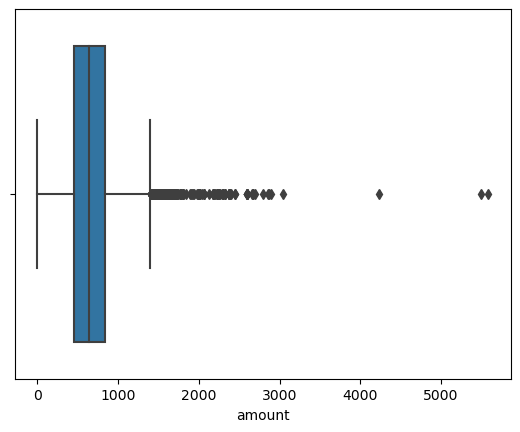

In [33]:
sns.boxplot(x=df_amount)

### En Aykırı Olan(Max Fiyatlı) Ürünün Kategorisini Öğrenelim

In [34]:
df[df["amount"]==df["amount"].max()]["category"].iloc[0]

'Set'

### Diğer Kategorilerin MAX'ları ile Kıyaslayalım

In [35]:
df.groupby("category")["amount"].max()

category
Blouse           1266.66
Bottom           1028.58
Dupatta           305.00
Ethnic Dress     1449.00
Saree            2058.00
Set              5584.00
Top              1797.00
Western Dress    2860.00
kurta            2796.00
Name: amount, dtype: float64

#### Veri Setinden Sadece Set Kategorisini Filtreleyelim ve Set Kategorisinin En Yüksek 70 Tutarını Görüntüleyelim.

In [36]:
filtered_df = df[df['category'] == 'Set']

# Filtrelenmiş veri çerçevesinde 'amount' sütununu en yüksekten sıralayalım
sorted_values = filtered_df.sort_values(by='amount', ascending=False)
sorted_values.groupby("category")["amount"].head(70)

42039     5584.00
11160     5495.00
24494     4235.72
89150     3036.00
121225    2894.00
           ...   
83337     1776.00
19130     1729.00
85921     1729.00
23877     1729.00
20511     1729.00
Name: amount, Length: 70, dtype: float64

### Set Verisinin Diğer İstatistik Değerlerini Kontrol Edelim

In [37]:
sorted_values.groupby("category")["amount"].describe().T

category,Set
count,50284.00000
mean,834.34500
std,283.76035
min,0.00000
25%,635.00000
50%,791.00000
75%,999.00000
max,5584.00000


<Axes: xlabel='amount'>

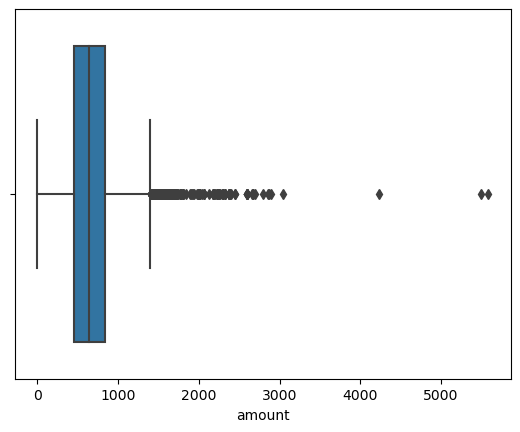

In [38]:
sns.boxplot(x=df_amount)

### Boxplot grafiğinde görüyoruz ki minimum olarak ilk çeyrekte aykırı değerler yok.  Ben de orta ve son çeyrekteki aykırı değerler üzerinden ilerleyeceğim. O yüzden Q1(percentile(df_amount,25)) kullanmayacağım.

In [39]:
df_amount.mean()

660.6312505142793

In [40]:
q2 = np.percentile(df_amount, 50)
q2

635.0

In [41]:
q3=np.percentile(df_amount, 75)
q3

835.0

In [42]:
ıqr=q3-q2
ıqr

200.0

In [43]:
aykiri_Ustsinir=q3+(3*ıqr)
aykiri_Ustsinir

1435.0

In [44]:
(df_amount > aykiri_Ustsinir)

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Name: amount, Length: 128975, dtype: bool

In [45]:
aykiri_trufal = (df_amount > aykiri_Ustsinir)

In [46]:
aykiri_trufal.head()

0    False
1    False
2    False
3    False
4    False
Name: amount, dtype: bool

In [47]:
df_amount[aykiri_trufal]#görüyoruzki 128bin satırdan sadece 1385 yüksek aykırı değer.

265       2130.00
299       1463.00
324       1902.86
349       1999.00
398       1463.00
           ...   
128463    1473.00
128665    1477.00
128757    1442.00
128777    1442.00
128873    1523.00
Name: amount, Length: 1385, dtype: float64

### Şimdi yaptığımız bu sınırlamanın sağlamasını yapacağız.

In [48]:
yuksekDeger = df[(df['amount'] >= 1435) & (df['amount'] <= 5600)]['amount'].count()
yuksekDeger

1385

In [49]:
dusukDeger=df[(df['amount'] <= 1435) & (df['amount'] >= 0)]['amount'].count()
dusukDeger

127590

In [50]:
df.shape

(128975, 23)

In [51]:
data = {
    'amount_aralığı': ['0-1435', '1435-5000'],
    'Veri_Sayısı': [dusukDeger, yuksekDeger]}

In [52]:
df_count = pd.DataFrame(data)

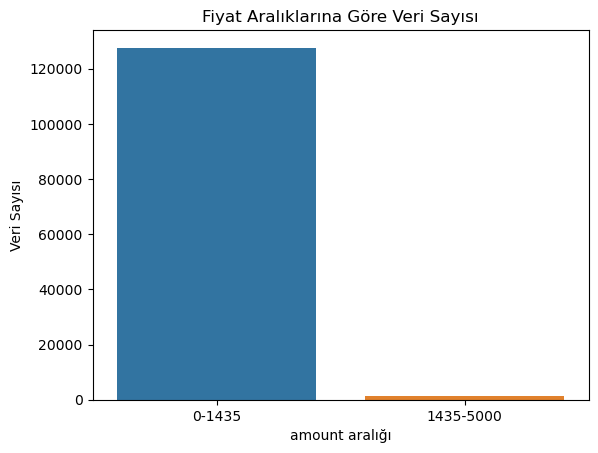

In [53]:
sns.barplot(x='amount_aralığı', y='Veri_Sayısı', data=df_count)
plt.xlabel('amount aralığı')
plt.ylabel('Veri Sayısı')
plt.title('Fiyat Aralıklarına Göre Veri Sayısı')
plt.show()

### Gördüğümüz gibi verinin %99 u 0 birim para ile 1435 birim para arasında. Kalan az kısım ise 1435 ile 5584 arasında.

In [54]:
df_amount[aykiri_trufal].index

Int64Index([   265,    299,    324,    349,    398,    416,    647,    734,
               753,    803,
            ...
            128302, 128343, 128402, 128423, 128437, 128463, 128665, 128757,
            128777, 128873],
           dtype='int64', length=1385)

### Aykırı değerlerin sınırlarını, ve boyutunu tespit ettik. Fiyat veri seti oluğu için ve boxplot grafiğinin gösterdiği şeklide sadece üst sınır belirledik. Fakat bir fiyat verisi olduğundan ürünlerde farklı fiyatlandırmaların olabilitesi var. Ve incelediğimde birden en max değeri çıkmadığını, 3000,4000 ve 5400 gibi yaklaşarak çıktığını gözlemledim. dropna veya fillna ile komple bu aykırı değerlerden  kurtulabiliriz ya da ortalama ile değiştirebiliriz. Ama ben işletme için kıymetli olduğunu düşündüğümden ve çok fazla olmadığı için herhnagi bir işlem yapmayacağım.

In [55]:
df.head()

,index,order id,date,status,fulfilment,sales channel,ship_service_level,style,sku,category,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Normal Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,False,Normal Ship


## Şimdi Verimiz Tertemiz Oldu! Eğer Bu Veriyi Makine Öğrenmesi Algoritmalarında Kullanacaksak Verileri Sayısallaştırmamız Daha İyi Olur

## SAYISALLAŞTIRMA

In [56]:
from sklearn import preprocessing

In [57]:
label_encoder=preprocessing.LabelEncoder()

In [58]:
df['order id'] = label_encoder.fit_transform(df['order id'])
df['status'] = label_encoder.fit_transform(df['status'])
df['fulfilment'] = label_encoder.fit_transform(df['fulfilment'])
df['sales channel'] = label_encoder.fit_transform(df['sales channel'])
df['ship_service_level'] = label_encoder.fit_transform(df['ship_service_level'])
df['style'] = label_encoder.fit_transform(df['style'])
df['sku'] = label_encoder.fit_transform(df['sku'])
df['category'] = label_encoder.fit_transform(df['category'])
df['currency'] = label_encoder.fit_transform(df['currency'])
df['size'] = label_encoder.fit_transform(df['size'])
df['asin'] = label_encoder.fit_transform(df['asin'])
df['courier status'] = label_encoder.fit_transform(df['courier status'])
df['ship_city'] = label_encoder.fit_transform(df['ship_city'])
df['ship_state'] = label_encoder.fit_transform(df['ship_state'])
df['ship_postal_code'] = label_encoder.fit_transform(df['ship_postal_code'])
df['ship_country'] = label_encoder.fit_transform(df['ship_country'])
df['promotion_ids'] = label_encoder.fit_transform(df['b2b'])
df['b2b'] = label_encoder.fit_transform(df['promotion_ids'])
df['fulfilled_by'] = label_encoder.fit_transform(df['fulfilled_by'])

In [59]:
df = df.drop(columns=['date'])# Zaman serili bir makine öğrenmesi uygulaması yapmayacağımız için bu sütunu kaldıracağız.

In [60]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.insert(4,"Min",df.min(),True)
info.insert(5,"Max",df.max(),True)
info.T  

,index,order id,status,fulfilment,sales channel,ship_service_level,style,sku,category,size,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
IsNull,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IsNa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Duplicate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique,128975.0,120378.0,13.0,2.0,2.0,2.0,1377.0,7195.0,9.0,11.0,...,10.0,2.0,1411.0,8956.0,70.0,9460.0,2.0,2.0,2.0,2.0
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,128974.0,120377.0,12.0,1.0,1.0,1.0,1376.0,7194.0,8.0,10.0,...,15.0,1.0,5584.0,8955.0,69.0,9459.0,1.0,1.0,1.0,1.0


In [61]:
df.head()

,index,order id,status,fulfilment,sales channel,ship_service_level,style,sku,category,size,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,70508,0,1,0,1,1342,6992,5,7,...,0,0,647.62,4795,28,2477,0,0,0,0
1,1,13615,5,1,0,1,847,4436,8,0,...,1,0,406.00,776,23,4857,0,0,0,0
2,2,45301,3,0,0,0,533,2633,8,8,...,1,0,329.00,5353,28,2671,0,1,1,1
3,3,43682,0,1,0,1,373,1767,7,5,...,0,0,753.33,6140,43,5659,0,0,0,0
4,4,90099,3,0,0,0,754,3837,6,0,...,1,0,574.00,1466,56,5549,0,0,0,1


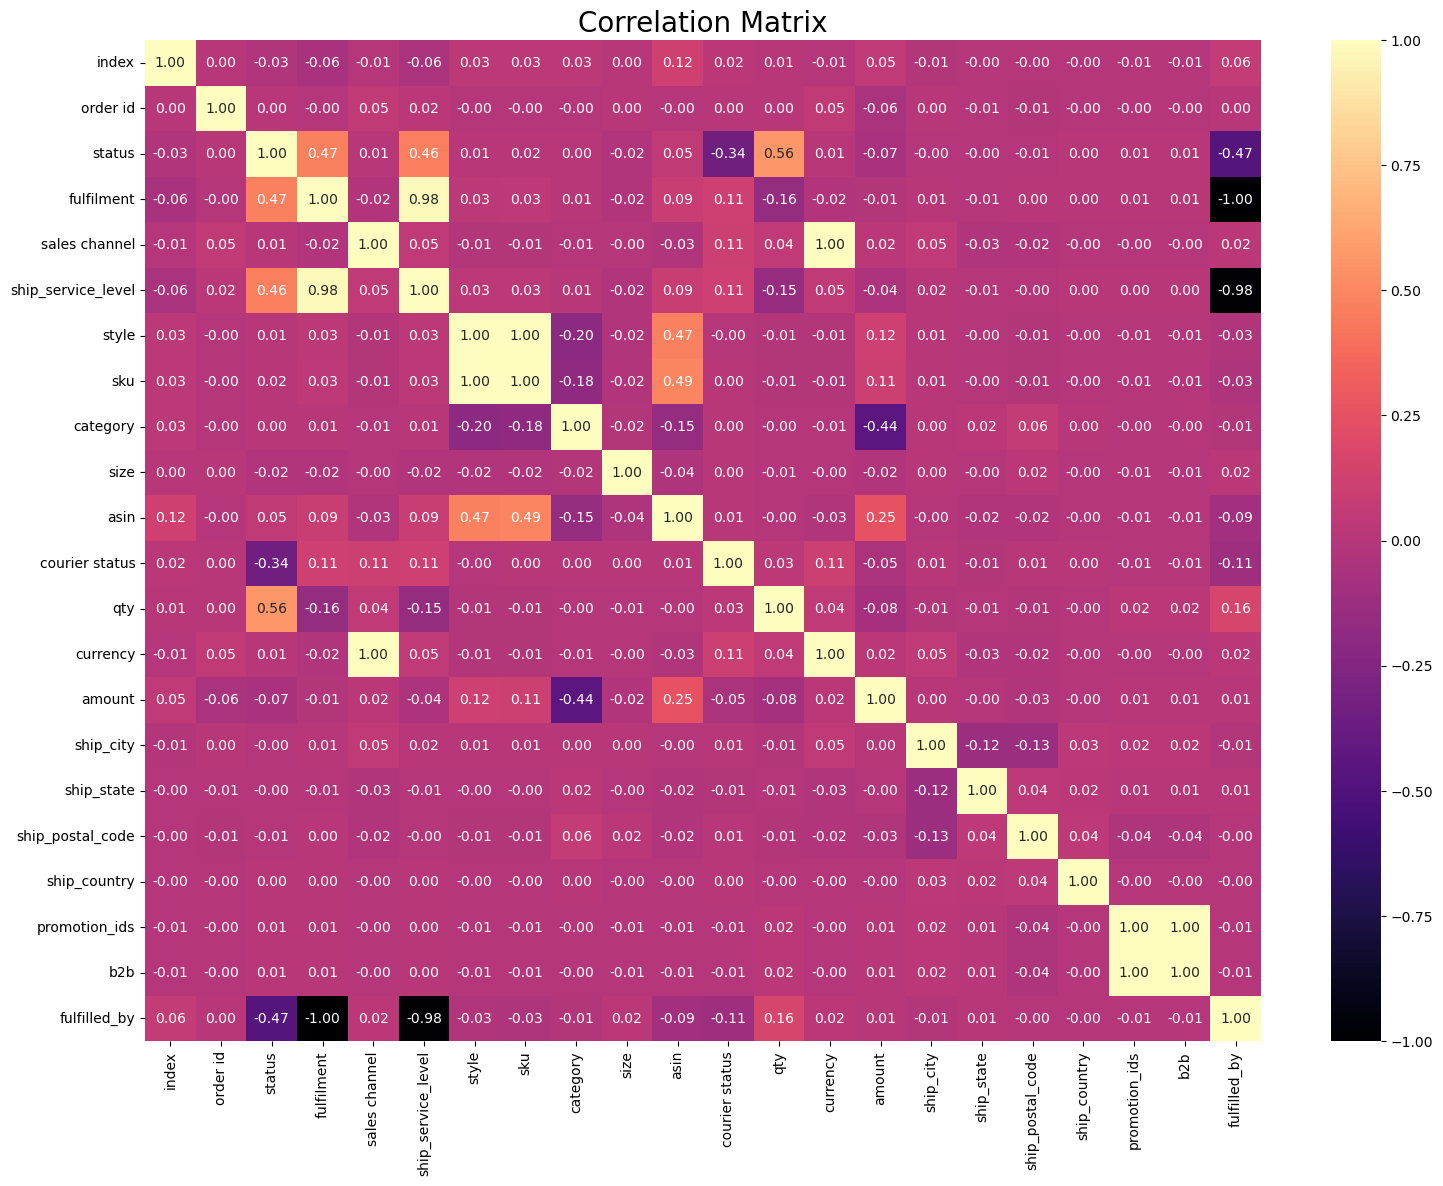

In [62]:
# Correlation matrix ile özelliklerin birbiri ile ilişkisine bakalım
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

* currency-salec channel
* b2b promotion ıds
* sku-style
* ship_service level-fulfillment
Bu corelasyonu 1 olan sütun çiftlerinden birer tane sileceğiz.Çünkü aynı çıktıyı veren çok sayıda sütun overfitinge yol açabilir ve doğruluk oranını negatif olarak etkileyebilir.

In [72]:
df[["sku","style"]].head(25)#sku silinecek çünkü ürün kodu ile size'ın birleştirilip yazılmış hali.

,sku,style
0,6992,1342
1,4436,847
2,2633,533
3,1767,373
4,3837,754
5,6277,1236
6,668,181
7,2748,555
8,5993,1183
9,3009,602


In [73]:
df[["ship_service_level","fulfilment"]].head(25)#fulfilment amazon olanlar shpservlevli Exited oluyor, fulfillment marchant olanlar Standart oluyor. Yani aynı şeyi ifade ediyorlar çıktı olarak. Ship service leveli çıkartacağım

,ship_service_level,fulfilment
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [74]:
df[["b2b","promotion_ids"]].head(25)#b2b olanlara promosyon uygulanmış diyebiliriz. yani aynı çıktıyı veriyorlar. Promotionu kaldıracağım.

,b2b,promotion_ids
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [75]:
df.drop('sales channel', axis=1, inplace=True)
df.drop('promotion_ids', axis=1, inplace=True)
df.drop('ship_service_level', axis=1, inplace=True)
df.drop('sku', axis=1, inplace=True)
df.head()

,index,order id,status,fulfilment,style,category,size,asin,courier status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by
0,0,70508,0,1,1342,5,7,5563,2,0,0,647.62,4795,28,2477,0,0,0
1,1,13615,5,1,847,8,0,5277,1,1,0,406.00,776,23,4857,0,0,0
2,2,45301,3,0,533,8,8,675,1,1,0,329.00,5353,28,2671,0,1,1
3,3,43682,0,1,373,7,5,4638,2,0,0,753.33,6140,43,5659,0,0,0
4,4,90099,3,0,754,6,0,4351,1,1,0,574.00,1466,56,5549,0,0,1


## Verimiz Artık Makine Öğrenmesine de Uygun Halde..

### Makine Öğrenmesine sokmadan önce ayıracağımız X ve Y train-test verilerini de MinMax Scaler işlemine tabi tutarak Normalizasyon Yapacağız. Bu sayede sayısal değerlerimiz belli bir aralık içine hapsedilmiş olacak ve istatistiki işlemleri daha rahat ve anlaşılabilir kılacak.

In [ ]:
df.to_csv("amazon_cleaned_forML.csv",index=False)